In [0]:
import numpy as np 
import  matplotlib.pyplot as plt


# 신경망의 기초


신경망은 컴퓨터의 역사와 거의 동시에 시작되었다고 해도 과언이 아닐 정도로 오래된 학문이다. 하지만 오랜동안 단층신경망에 대한 연구가 중심을 이뤘고 단층신경망의 한계에 대한 지적(XOR 문제) 에 의해 한때 긴 침채기를 맞은 후에 다시 다층 신경망 오류 역전파 모델에 의해 그 한계를 극복하고 부활하였다. 본 자료에서는 신경망의 기초가 되는 가장 기초적인 수렴에 의한 문제해결방법을 고찰해 보고, 역전파모델의 기초가 되는 경사하강법에 대해 학습해본다. 


<hr>

### 회귀분석과 신경망

신경망의 문제를 크게 나누면 회귀(regression)과 분류(classification)으로 나눌 수 있다. 간단히 설명하면 회귀는 어떤 수치를 예측하는 것이고 분류는 그것이 어떤 유형에 속하는가를 예측하는 것이다. 

예를 들어 컴퓨터가 어떤 사람의 모습을 보고 그 사람이 남자인지 여자인지를 예측한다면 이것은 남자,여자라는 유형(category)의 문제이므로 이를 분류의 문제라고 이야기한다. 그러나 만일 그 사람의 키를 유추한다면 이는 연속적인 값을 예측하는 문제로서 이를 회귀분석의 문제로 표현한다. 



#### 회귀분석의 개념과 단순선형 회귀분석

회귀 분석이란 통계학에서 출발한 말로 어떤 값들의 경향성, 원인을 파악하는 방법을 말한다. 이는 데이터의 어떤 법칙 + 오차 에 의해 발생한다는 가정을 하고 오차를 포함한 데이터로부터 그 법칙성을 찾는 것을 의미한다. 

예를 들어 ${y = x \times 2}$ 라는 식에 오차를 넣은 그래프를 한번 만들어 그려보도록 하겠다. 


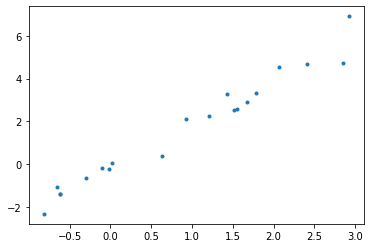

In [9]:
n = 20
x = np.random.normal(1,1,n)
y = x * 2 + np.random.normal(0,0.5,n)
plt.plot(x,y,'.')
plt.show() 

위의 데이터는 ${y = x \times 2}$ 라는 규칙과 오차를 통해 생성된 그래프이다. 그렇다면 이 데이터로부터 다시 ${y = x \times 2}$ 를 유추할 수 있을까?
물론 이 문제는 정답이 존재하지 안는다. 저런 유형의 데이터는 1차함수가 아닌 다른 유형의 법칙에 의해서도 발생할 수 있기 때문이다. 하지만 만일 1차함수에 의해 발생한다고 가정했을 경우 가장 가능성이 높은건 저 데이터의 중심을 통과하는 직선이 된다. 정확히는 

- 점들과의 거리의 오차의 제곱이 최소화되는 직선 

을 찾는 문제로 표현된다. 이렇게 어떤 데이터의 분포의 경향을 직선으로 분석하는기 기법을  단순 선형회귀분석이라고 한다. 이 문제를 수학적으로 도출하는 과정은 생략하고 간단히 파이썬의 라이브러리로 구현한 결과를 한번 보자. 





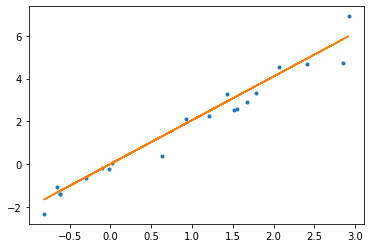

In [13]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(x.reshape(n,1),y)
plt.plot(x, y , '.')
plt.plot(x, x * regr.coef_)

이 것은 sklearn 이라는 라이브러리를 사용해 선형회귀분석을 수행한 것이다. 
```
regr = linear_model.LinearRegression() 
```
을 통해  은 선형회귀분석 모델 클래스 regr 을 선언한 후에 
```
regr.fit(x.reshape(n,1),y)
```

을 통해 x 와 y값을 입력해 분석함으로서 기울기(w) 값을 얻어내며 이 값은 regr.coef_ 로 생성된다. 참고로 ${y = w \times x + b}$ 의 형태는 regr.intercept_ 에 b 값이 생성된다. 

> 주의: x.reshape는 x를 2차원으로 변한한 것이다. 이런 모델은 입력->출력에서 입력값이 하나이상인 경우를 지원하기 때문에 x를 2차원 배열로 받는다.  예를 들어  
$${y = w1 \times x1 + w2 \times x2 + b}$$
같은 모델도 지원해야 하므로 이럴땐 x 값이 두개씩 쌍으로 들어가야한다.(  예: [ [1,1], [2,3], [4,0] ... ] ) 그러므로 1차원 입력값인 x = [1,2,3] 을 1,2,3 이면 [[1], [2], [3]] 형태로 바꿔주어야 하기 때문에 reshape을 통해서 n 을 nx1 인 2차원 배열로 바꿔준 것이다. 이는 거의 모든 파이썬 학습라이브러리에서 이런 형태를 요구하기 때문에 익숙해지는 것이 좋다. 



#### <font color = 'red'> 연습문제 0-1 : 단순 선형 회귀 직접 해보기 
다음 식으로 위의 예제처럼 20개의 x에 대해 다음의 규칙에 의해 생성되며 오차 편차가 0.5 인 데이터를 생성하고 이를 회귀분석 해보세요 
$${y = -2 \times x + 2}$$




In [0]:
# 연습문제 코드 작성


####  수렴에 의한 회귀분석 해결해보기

이제 위에서 통계학적인 선형회귀분석기법이 아닌 다른 기법을 통해 위의 문제를 푸는 방법을 알아보자.  먼저 ${y = x \times 2}$ 인 데이터를 상정해보자.  이때 0.2 라는 가중치를 학습하는 간단한 회귀분석을 해보도록 하자. 

이를 위해 x , y 그리고 랜덤한 초기 w를 설정해보도록 하겠다. 

In [0]:
x = np.random.normal(0.5, 0.1,10)
y = x * 0.2
w_init = np.random.random()
print("init w :",w_init)

이는 w 값이 크면 이를 줄이고, w 값이 작으면 키우는 방식으로 
이를 위해 예측한 값과 실제 측정한 값 사이의 오차값 d 를 구한다. 

<div  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
    d = y - x * w  
</div>

이제 오차값에 학습율 0.1 을 곱해서 w 를 변경시킨다. 

<div  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
    w += d * 0.1 
</div>

이제 이것을 모든 x[i], y[i] 에 대해 처리하는 것을 100번 반복한 후에 w 값을 보도록하자. 

In [0]:
w = w_init
for step in range(100):
    for i in range(len(x)) :
        d = (y[i] - x[i] * w) 
        w += d * 0.1 
print(w)        

w 가 원래 설정한 0.2 에 근접한 것을 볼 수 있을것이다. 

이번에는 d와 w의 변화를 ds, ws라는 배열에 저장해서 출력해보도록 하겠다. 

In [0]:
w = w_init
ds,ws  = np.array([]), np.array([])
for step in range(100):
    for i in range(len(x)) :
        d = (y[i] - x[i] * w) 
        w += d  * 0.1 
        ds = np.append(ds,abs(d))        
        ws = np.append(ws,abs(w))    
print(w)
plt.plot(ds)
plt.plot(ws)
plt.show()


오차량이 0에 수렴해가는 것을 볼 수 있다. 

하지만 이렇게 일일이 x 에 대해 연산을 하는 것보다는 한번에 x 전체에 대해 d 를 구함으로서 속도를 높일 수 있다.

<pre  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
d = (y -  x * w).mean() 
w += d
</pre>    

In [0]:
w = w_init
ds,ws  = np.array([]), np.array([])
for step in range(700):    
    d = ((y - x * w) * 1 ).mean()
    w += d * 0.1 
    ds = np.append(ds,abs(d))
    ws = np.append(ws,w)
print(w)
plt.plot(ds)
plt.plot(ws)
plt.show()

#### 다중 회귀분석 해보기 

다중 회귀분석이란 변수가 둘 이상인 경우를 의미한다. 이를 선형회귀분석의 개념으로 다루면 w 도 둘이상이 존재하게 된다. 그 한예로 이번에는 두개의 입력값 x1, x2 에 대해 다음과 같은 공식으로 생성된 x,y 를 상정해 보겠다. 

$${y = 2 \times x1 + 4 \times x2 }$$

에 weight 0.2,  -0.4 를 회귀분석하는 경우를 생각해보자. 이를 x,y 데이터와 초기 weight 를 다음과 같이 설정하도록 한다. 

In [0]:
n = 10
x = np.random.random((n,2))
y = np.sum( x * [2,-4] , axis = 1)
w_init = np.random.random(2)
print("w:\n",w_init)
print("x:\n",x)
print("y:\n",y)

이를 위에 모델에 대입하여 풀어보도록 하겠다. 이때 d 를 구하는 식은 다음과 같다. 

<pre  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
 d = ((y - np.sum(x * w, axis = 1) ) ).mean()
</pre>


In [0]:
w = w_init.copy()
ds,ws1, ws2  = np.array([]), np.array([]), np.array([])
for step in range(100):    
    for i in range(len(x)):
        d = y[i] - np.sum( x[i] * w )        
        #ds = np.append(ds,abs(d).mean())       
        w += d * 0.1            
    ds = np.append(ds, abs(y - np.sum(x * w, axis = 1)).mean())    
print(w, d)
plt.plot(ds)
plt.show()

d 값이 일정수치 이상 줄어들지 안는 것을 볼 수 있을 것이다. 이는 오차값이 두개의 weight 값에 같이 적용됨으로서 각 weight 값의 개별적인 수렴이 안되기 때문이다. 

<b> 그러면 어떻게 하나의 오차값으로 두개의 w값을 조정할 수 있을까? </b> 여기에 대해 해답은 각 가중치의 오차를 입력값에 의해 나눠갖는다는 것이다. 예를 들어 x1 이 0.2 이고 x2 가 0.4 이고 오차가 0.3 이면  x1 의 가중치는 0.2 * 0.3 로 0.06을  받고 x2 의 가중치는 오차의 2/3 인 0.2 를 받는다. 

이를 수식으로는 다음과 같이 표현한다. 여기서 $\eta$ 는 지금까지 우리가 0.1로 두고 사용한 학습률을 의미하고 $y - y'$ 는 기대값과 실제결과의 오차값이다.  그리고 모든 가중치들은 자신의 입력값 $x_i$만큼 그 영향력을 받는다. 

$$ w_j = w_j + \eta(y - y')x_i $$

이는 느리지만 점진적으로 각 값의 가중치들이 천천히 안정화되어가는 효과를 갖도록 한다. 이제 이를 반영한 오차 계산 및 가중치 반영방법을 보자. 


<pre  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
d = y[i] - np.sum( x[i] * w ) 
w += d * x[i]  * 0.1     
</pre>

d는 위에서 $y-y'$ 의 값을 의미하며 이를 x벡터에 곱한 후에 학습률 0.1 을 곱하여 w에 반영한 것이다. 이제 이것을 반복하여 생성된 가중치와 오차범위를 보자. 

In [0]:
w = w_init.copy()
ds  = np.array([])
for step in range(100):    
    for i in range(len(x)):
        d = y[i] - np.sum( x[i] * w ) 
        #ds = np.append(ds,abs(d).mean())       
        w += d * x[i]  * 0.1     
    ds = np.append(ds, abs(y - np.sum(x * w, axis = 1)).mean())
print(w, d.round(4))
plt.plot(ds)
plt.show()

위에 단순 회귀분석에서 각 샘플 하나하나(xi) 마다 오차를 계산하지 안고 한번에 전체 x 에 대해 오차를 계산하여 병렬성을 높이는 방법을 알아봤었다. 과연 이 다중 회귀분석에서도 이것이 통할까? 이를 위해 위의 코드의 

<pre  style  = "background-color:#EEEEEE; margin:20px; padding:10px">
for i in range( len(x) ) : 
    d = y[i] - np.sum( x[i] * w ) 
    w += d * x[i]  * 0.1
</pre> 

이 부분을 각각의 개별 연산이 아닌 행렬연산으로 바꾸어 보겠다. 먼저 다음은 전체 x 에 대해 현재 w 에 의해 생성된 y'값이다. 

In [0]:
np.sum(x * w, axis = 1)

이것을 y의 기대값행렬로부터 빼주면 오차행렬 d를 생성할 수 있다. 

In [0]:
d = y - np.sum(x * w, axis = 1)
print(d)

이제 d 와 x 를 곱하면 w 각각에 대한 적용오차를 구할 수 있다. 단 (10,2) 와 곱을 해주려면 d를 (10,1) 로 세워줘야 하므로 reshape 를 포함해야 한다. 

In [0]:
x * d.reshape(10,1)

이제 이것에 학습률을 곱한 후에 합산해보자. 합산은 행이 아닌 열로 이뤄지므로 axis = 0 이어야 한다. 

In [0]:
np.sum(x * d.reshape(10,1) * 0.1, axis = 0)

위의 코드에서 개별 w 마다 0.1 을 곱하는것보다는 다 계산후에 0.1을 곱해도 결과는 마찬가지지만 계산량이 적기때문에 이제 w값을 다음과 같이 업데이트 할 수 있다. 

In [0]:
print("w before:",w)
w += np.sum(x * d.reshape(10,1), axis = 0) * 0.1 
print("w after:",w)

이제 이것을 이용해 간략화된 다중회귀분석을 수행해보자. 

In [0]:
w = w_init.copy()
ds = np.array([])
for step in range(100): 
    d = y - np.sum(x * w, axis = 1)
    w += np.sum(x * d.reshape(10,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())
print(w)    
plt.plot(ds)
plt.show()

In [0]:
n,dm = 10,4
x = np.random.normal(0.5, 0.1,(n,dm)) 
w_exp = np.random.random(dm)
y = np.sum(x * w_exp, axis = 1)
w_init = np.random.random(dm)
print(y)

In [0]:
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    d = y - np.sum(x * w, axis = 1)    
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())    
print(w_exp, w, ds[-1].round(4))  

plt.plot(ds)
plt.show()

<hr> 

### 분류와 Sigmoid 함수

이번에는 분류문제를 해결해보자. 분류문제중에 가장 간단한 or 문제를 먼저 생각해보자. 무척 간단하다고 생각할 지도 모르겠다.  위에서 직선의 연관성을 도출한 것에 비하면 이것이 훨씬 쉽게 느껴질 수도 있다. 먼저 데이터를 만들어보자. 


In [0]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])

이제 위에서 사용한 알고리즘을 돌려보도록 하자. 

In [0]:
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(100):         
    d = y - np.sum(x * w, axis = 1)    
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", np.dot(x,w), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


우리가 원하는 답은 0,1,1,1 이지만 알고리즘의 출력은 0,0.6, 0.6 1.3  정도가 나올 것이다.  왜 이런 문제가 생길까? 

정답은 0,1 에도 1을  만들고 1,0 에도 1을 만들지만 1,1 에도 1을 만드는 방법은 없다는 것이다. 왜냐하면 우리가 사용하는 방법은 단순히 입력에 가중치를 더해서 합산하는 방법에 지나지 않기 때문이다.  이런 방식은 실수값을 예측하는 회귀문제에는 잘 맞지만 범주형 데이터를 다루는 분류문제에는 적합하지 안다. 

이런 문제를 해결하기 위해서는 어떤 현상이 발생하는 확률을 계산하기 위한 함수인 sigmoid 함수가 적합하다. 이 함수의 정의는 다음과 같다. 



In [0]:
def sig(x):
    return 1 / ( 1 + np.exp(-x) )

이 함수는 결과적으로 다음과 같은 형태를 띄며 결국 모든 값을 0 ~ 1 사이로 만들어 버린다. 그리고 경계를 기점으로 기울기가 양쪽으로 다 0 에 수렴한다.  결국 이 함수를 이용하면 0과 1 같은 상태를 표현하는데 적합하다. 

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-10,10,100)
y = sig(x)
plt.plot(x,y)
plt.show() 

이제 이 함수를 사용해 위의 예제를 풀어보도록 하겠다. 이번에는 좀더 많은 시행을 시켜보자. 

In [0]:
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()



이제 3가지 결과값은 상당히 1에 근접한 것을 볼 수 있다. 또한 학습또한 1을 넘김으로서 발생하는 오차에 구애받지 않고 가중치를 증가시켰음을 알 수 있다. 하지만 0,0 의 값이 0.5 가 나온 것에 대한 불만이 있을 것이다. 이것은 위의 sigmoid 함수가 -무한대 부터 +무한대 까지의 범위를 받는 함수이기에 발생하는 문제이다. 

이것은 sig 함수를 다음과 같이 변경해서 해결이 가능하다. 


In [0]:
def sig(x):
    return 1 / ( 1 + np.exp(x * -10 + 5) )
x = np.linspace(0,1,100)
y = sig(x)
plt.plot(x,y)
plt.show() 

비슷하게 느껴질 수도 있지만 위의 sigmoid 함수는 0~1 까지의  값의 변화에 대응하여 0과 1에 수렴하도록 변경한 것이다. 이제 이를 이용하여  위의 예제를 다시 돌려보자. 

In [0]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


이제 값들이 상당히 근접한 것을 알 수 있다.  

이번에는 위의 예를 and 로 변환해서 풀어보자. 


In [0]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(1000):         
    o = sig(np.sum(x * w, axis = 1) ) 
    d = y - o 
    w += np.sum(x * w * d.reshape(n,1), axis = 0) * 0.1 
    ds = np.append(ds,np.abs(d).sum())        
print("result:", sig( np.dot(x,w) ), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()


생각보다 결과가 좋지 안음에 갸웃할 것이다. 사실 가만히 생각해봐도 and 는 or 에 비해 훨씬 더 정교한 문제이다. 그런 문제를 다룰때 위에서 우리가 다룬 x 를 기반 오차를 결정하는 방법은 이처럼 x 가 0이나 1에 고정되는 방식일 경우 그 한계가 드러난다. 오차가 발생하는 범인은 x 만이 아니기에 우리는 여기서 w도 그 원인의 하나로 그 오차율에 영향을 고려해야 한다. 

이제 w의 변경치인 wd 공식을 다음과 같이 변경하도록 하겠다. 

$$ \large wd = w * x * d $$

이는 weight 와 x 의 연산이 필요하므로 다음과 같은 공식을 거친다. 


#### and gate 해결법

In [0]:


x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,0,0,1])
n,dm = 4,2
w_init = np.random.random(dm)
w = w_init.copy()
ds = np.array([])
for step in range(10000):         
    o = sig( np.sum(x * w, axis = 1))
    d = y - o
    wd =  np.sum( (x * w).T * d , axis = 1) 
    w += wd     
    ds = np.append(ds,np.abs(d).sum())      
print("result:", sig( np.dot(x,w) ).round(4), "error:",ds[-1].round(4))  
plt.plot(ds)
plt.show()

### xor 문제와 다층 신경망 

위에서 우리가 다룬 것은 초기 학자들이 연구하던 단층 신경망의 예이다. 당시에는 이러한 분류에 대한 수학적인 방법론들이 정립되지 안았기 때문에 이런 단층 신경망으로 문제를 해결하는 것도 놀랍게 느껴졌지만 결국 이러한 신경망은  

$$ y = w1x1 + w2x2 + ..  $$

의 구조를 지니며 이것은 1차원이든 2차원이든 3차원이든 직선이나 평면에 의한 문제의 분류밖에 해결하지 못한다는 것이 증명되고 그 한계로 XOR 문제가 제시되었다. 

XOR 문제는 간단한다. 

0,0 -> 0
0,1 -> 1
1,0 -> 1
1,1 -> 0 

이 되며 이는 결과적으로 평면상에 다음과 같은 형태로 표현된다. 




In [0]:
plt.scatter([0,0,1,1],[0,1,0,1], c=[0,1,1,0])

이 문제를 해결하기 위해 나온 이론이 입력과  출력사이에 중간레이어를 두는 방법이다.  지금까지 우리가 다뤘던 신경망이 다음과 같은 구조라면 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory&fname=http%3A%2F%2Fcfile10.uf.tistory.com%2Fimage%2F261AC64E56C2D0E7241637" 
    width = 400
    style = "float:left"     
    title = "출처: https://untitledtblog.tistory.com/27" > 
    



다층 신경망은 다음과 같은 구조를 지닌다. 단, 아래에는 은닉층이 하나인 경우에 대한 예시일 뿐이지만 은닉층은 얼마든지 여러층으로 만들 수 있다. 

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTZfMzQg/MDAxNDk3NTc4MDc4NTU4.C0svtndk_igat9FquGev3il4HWs2mEKarZPuzI0kgMcg.75f89hjNck6eLQNZWQ4-QZiWNnArNKnuEXvxoL3n0aAg.PNG.samsjang/%EC%BA%A1%EC%B2%98.PNG?type=w2" 
    width = 600
    style = "float:left"     
    title = "출처: https://m.blog.naver.com/samsjang/221030487369" > 



이와 같은 간단한 발상을 왜 못했을까? 하는 생각이 들 것이다. 하지만 오류를 최소화하는 1차원적인 발상으로는 저 은닉층을 거치는 weight 값을 어떻게 처리해야 할지 당시에는 몰랐다.  그리고 이 문제를 해결한 것이 '오류역전파 모델' 이다. 

#### 오류 역전파 모델 


위의 예제에서 우리는 오류에 대한 책임을 죄다 w 에 돌려버렸다. 당연한것이 입력인 x는 고정되어있기 때문에 우리가 수정 가능한 것은  w 밖에 없었기 때문이다. 하지만 역전파 모델에서는 그 입력의에도 책임을 돌린다.그래야 은닉층의 오류를 기반으로 다시 그 이전계층의 가중치 w 에 대한 수정이 가해지기 때문이다. 

위의 그림을 기준으로 입력을 i ,은닉을 h, 출력을 o 라고 할 경우 신경망이 결과를 도출하는 과정은  i -> h -> o 의 형태로 이뤄지지만 망에 대한 수정은 o -> h -> i 방향으로 진행된다. 이것은 여러개의 은닉층을 가진 경우에도 마찬가지로 역으로  진행되기에 '역전파 모델' 이라고 불리우며 현재까지 모든 신경망 학습의 기본원리이다. 


역전파 과정을 좀더 자세히 표현하면 

- 출력층의 에러 d_out 을 구한다. 
- d_out 을 기반으로 w_h2o 를 업데이트한다. 
- 은닉층의 에러 d_hidden 을 구한다. 
- d_hidden 을 기반으로 w_i2h 를 업데이트한다. 

이것의 수학적 모델은 매우 심플하다. w 는 w 가 오류에 얼마나 어떤 방향으로 영향을 주었는가를 기준으로 그 수치를 업데이트 하고 은닉층은 은닉층의 값이 얼마나 어떤 방향으로 오류에 영향을 주었는가를 계산한다. w 의 오류는 w 값의 변화로서 영향을 주며 은닉층의 오류는 다시 이를 기준으로 그 이전계층의 w 오류를 계산하는데 사용된다. 

다만 좀더 세밀히 접근하면 단순히 값에 영향을 준 사실 보다도 그 x 가 오류에 얼마나 큰 차이를 준 것인지 기울기를 구하여 그 조정양을 조절하게 되는데 이때 미분이 사용된다. 하지만 이 부분은 지금은 무시하고 영향력을 중심으로 생각해도 좋다. 



이제 이를 기반으로 xor 문제를 풀 수 있도록 다계층 신경망을 생각해보자. 

In [0]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])

일단 은닉층은 하나의 층으로 해보도록 하겠다. 그리고 은닉층의 노드숫자는 hn 으로 정의한다. 그러면 입력->은닉의 가중치들의 숫자는 dm * hn 이 되고 은닉 -> 출력의 가중치의 숫자는 hn 이 된다. 

In [0]:
n,hn,dm = 4,3,2                 # 데이터 갯수, 히든 노드, 입력 노드수
w1 = np.random.random((hn,dm))  # 은닉층 가중치
w2 = np.random.random(hn)       # 출력층 가중치
print("w1:\n",w1,"\nw2:\n",w2)

이제 이를 이용해 x 의 입력을 y로 전달하는 과정을 만들어보도록 하겠다. 

In [0]:
h = sig( np.dot( x, w1.T ))
print(h)
o = sig( np.sum( h * w2 , axis = 1) ).round(4)
print(o)

이번엔 이를 통해 업데이트 값을 계산해보자. 위에서 다룬 방식으로 업데이트 값을 계산해보도록 하겠다. sigp 는 sigmoid 함수의 미분함수로 sigp(x) 는 x(1-x) 이다. 이 부분까지 고려하면 너무 복잡하니 그냥 x 라고 생각하는게 더 편할듯하다. 

In [0]:
def sigp(x):
    return x  * (1-x)

d = d = (y - o)*sigp(o)
wd2 = h.T.dot( d ) * lr

print(wd2)
w2 += wd2

이제 hidden 의 오차를 계산해보자. 은닉층의 오차는 출력 가중치와 출력오차의 곱이 되며 여기에 x 를 반영해주면 은닉계층의 가중치의 변동값이 나온다. 

In [0]:
hd = d.reshape(-1,1).dot(w2.reshape(-1,1).T)
print(hd)
wd1 = x.T.dot(hd) 
print(wd1)
w1 += wd1 * lr

그런데 여기에 한가지 빼먹은게 있다. 실제 학습에서는 곱 연산만으로는 모든 값의 범위를 대응하기 어렵기 때문에 이런 문제를 쉽게 해결하기 위해 각 출력마다 전체적인 범위를 조정하는 bias 라고 하는 값을 지닌다. 이들은 모든 출력에 포함되며 역전파시에도 직접적으로 조정치를 얻는다. 현재 우리가 다루는 네트워크에서는 은닉과 출력 2개의 값에 bias 를 줄 수 있기에 이를 반영하면  정방향처리는 다음과 같이 바꿀 수 있다. 


In [0]:
b1,b2 = 0

h = sig( np.dot( x, w1.T ) + b1)
o = sig( np.sum( h * w2 , axis = 1) + b2 ).round(4)

또한 바이어스의 업데이트는 바로 직접적인 조정을 받기 때문에 출력층과 은닉층의 바이어스는 다음과 같이 업데이트된다. 


In [0]:
b2 += d * lr 
b1 += hd * lr 

위의 모든 사항을 반영하여 신경망을 완성하면 다음과 같다. 

In [0]:
x = np.array([[0,0], [0,1], [1,0], [1,1]] )
y = np.array([0,1,1,0])
n,hn,dm = 4,2,2
b1,b2 = 0,0
w1 = np.random.random((hn,dm))
w2 = np.random.random(hn)
lr = 0.01

def sigp(x):
    return x  * (1-x)

ds = np.array([])
for step in range(100000):         
    h = sig( np.dot( x, w1.T ) + b1)
    o = sig( np.sum( h * w2 , axis = 1) + b2 ).round(4) 
    d = (y - o)*sigp(o)
    
    
    wd2 = h.T.dot( d ) * lr
    
    hd = d.reshape(-1,1).dot(w2.reshape(-1,1).T)
    wd1 = x.T.dot(hd) 
    
    w2 += wd2 * lr    
    b2 += d * lr    
    w1 += wd1 * lr
    b1 += hd * lr 
    if step % 100 == 0 :
        ds = np.append(ds,np.abs(d).sum())        
    

print("result:", o , "error:",ds[-1].round(4))  
print(b1,b2)
plt.plot(ds)
plt.show()


